In [77]:
import lucem_illud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
import spacy
import scipy
from tqdm.auto import tqdm

import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

## 1. Load and Preprocess News Dataset - FOX, ABC, MSNBC

In [17]:
def load_preprocess_df(file_path, video_date, video_title):
    ''' 
    Load scrpaed comments csv into DataFrame, preprocess column information
    Arg:
        file_path (str): input csv file path of all comments and replies in a given video
        video_date (str): the publish date of this news video, different from comment's publish date
    '''

    df = pd.read_csv(file_path)
    df.rename(columns={'PublishedAt': 'Comment PublishedAt'}, inplace=True)
    df['Comment PublishedAt'] = pd.to_datetime(df['Comment PublishedAt']) # ensure entries are DataTime
    df['Comment PublishedAt'] = df['Comment PublishedAt'].dt.strftime('%Y-%m-%d') # ignore hour/minute/second
    df['Video PublishedAt'] = pd.Timestamp(video_date)
    df['Video Title'] = video_title
    
    return df

### 1.1 Fox News 2020

In [18]:
# 2020/3/9 "Tucker: We must remain calm but not complacent about the coronavirus"
fox3_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2003_comments.csv', '2020-03-09', 'Tucker: We must remain calm but not complacent about the coronavirus')
# 2020/4/10 "10 percent of US workforce now unemployed"
fox4_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2004_comments.csv', '2020-04-10', '10 percent of US workforce now unemployed')
# 2020/5/17 "Gutfeld: Where were the media warnings back when coronavirus pandemic started?"
fox5_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2005_comments.csv', '2020-05-17', 'Gutfeld: Where were the media warnings back when coronavirus pandemic started?')
# 2020/6/26 "Coronavirus cases are surging; Who's to blame?"
fox6_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2006_comments.csv', '2020-06-26', "Coronavirus cases are surging; Who's to blame?")
# 2020/7/27 "Dr. Fauci says he's 'cautiously optimistic' regarding coronavirus vaccine"
fox7_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2007_comments.csv', '2020-07-27', "Dr. Fauci says he's 'cautiously optimistic' regarding coronavirus vaccine")
# 2020/8/11 "Big 10 conference officially postpones 2020 football season"
fox8_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2008_comments.csv', '2020-08-11', 'Big 10 conference officially postpones 2020 football season')
# 2020/9/15 "Coronavirus whistleblower speaks out about possible COVID origin on 'Tucker'"
fox9_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2009_comments.csv', '2020-09-15', "Coronavirus whistleblower speaks out about possible COVID origin on 'Tucker'")
# 2020/10/11 "Trump says he no longer has coronavirus and is 'immune'"
fox10_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2010_comments.csv', '2020-10-11', "Trump says he no longer has coronavirus and is 'immune'")
# 2020/11/9 "Biden could propose national mask mandate as part of COVID-19 plan"
fox11_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2011_comments.csv', '2020-11-09', 'Biden could propose national mask mandate as part of COVID-19 plan')
# 2020/12/27 "Judge Jeanine: Congress's incompetence over COVID relief bill"
fox12_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/fox_2020/fox2012_comments.csv', '2020-12-27', "Judge Jeanine: Congress's incompetence over COVID relief bill")


In [24]:
dfs = [fox3_df, fox4_df, fox5_df, fox6_df, fox7_df, fox8_df, fox9_df, fox10_df, fox11_df, fox12_df]
fox_df = pd.concat(dfs, ignore_index=True)

### 1.2 ABC News 2020

In [20]:
# 2020/01/27 "Race to contain deadly coronavirus with 5 confirmed US cases"
abc1_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2001_comments.csv', '2020-01-27', 'Race to contain deadly coronavirus with 5 confirmed US cases')
# 2020/02/24 "Italy struggles to contain new coronavirus outbreak"
abc2_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2002_comments.csv', '2020-02-24', 'Italy struggles to contain new coronavirus outbreak')
# 2020/03/24 "Lesson from South Korea on how to slow the COVID-19 spread"
abc3_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2003_comments.csv', '2020-03-24', 'Lesson from South Korea on how to slow the COVID-19 spread')
# 2020/04/06 "Queen Elizabeth address public amid coronavirus outbreak"
abc4_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2004_comments.csv', '2020-04-06', 'Queen Elizabeth address public amid coronavirus outbreak')
# 2020/05/27 "Facing cancer during COVID-19"
abc5_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2005_comments.csv', '2020-05-27', 'Facing cancer during COVID-19')
# 2020/06/25 "Latest updates on COVID-19: June 25, 2020"
abc6_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2006_comments.csv', '2020-06-25', 'Latest updates on COVID-19: June 25, 2020')
# 2020/07/02 "US coronavirus infections surge amid new warnings, closures | WNT"
abc7_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2007_comments.csv', '2020-07-02', 'US coronavirus infections surge amid new warnings, closures | WNT')
# 2020/08/24 "The new COVID-19 travel trend is a 'flexcation'"
abc8_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2008_comments.csv', '2020-08-24', "The new COVID-19 travel trend is a 'flexcation'")
# 2020/09/22 "COVID-19 crisis threatens children’s mental health"
abc9_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2009_comments.csv', '2020-09-22', "COVID-19 crisis threatens children's mental health")
# 2020/10/15 "Joe Biden pressed whether he would take a COVID-19 vaccine l ABC News Town Hall"
abc10_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2010_comments.csv', '2020-10-15', 'Joe Biden pressed whether he would take a COVID-19 vaccine l ABC News Town Hall')
# 2020/11/25 "Thanksgiving COVID-19 warning"
abc11_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2011_comments.csv', '2020-11-25', 'Thanksgiving COVID-19 warning')
# 2020/12/07 "Sean Penn’s COVID-19 testing mission"
abc12_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/abc_2020/abc2012_comments.csv', '2020-12-07', "Sean Penn's COVID-19 testing mission")

In [26]:
dfs = [abc1_df, abc2_df, abc3_df, abc4_df, abc5_df, abc6_df, abc7_df, abc8_df, abc9_df, abc10_df, abc11_df, abc12_df]
abc_df = pd.concat(dfs, ignore_index=True)

### 1.3 MSNBC News 2020

In [22]:
# 2020/02/08 "13 Americans Infected With COVID-19 On Cruise Ship In Japan"
msnbc2_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2002_comments.csv', '2020-02-08', '13 Americans Infected With COVID-19 On Cruise Ship In Japan')
# 2020/03/16 "Historic: First Person to Test Covid Vaccine talks to Ari Melber in 2020"
msnbc3_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2003_comments.csv', '2020-03-16', 'Historic: First Person to Test Covid Vaccine talks to Ari Melber in 2020')
# 2020/03/31 "See Bill Gates’ Pandemic Warnings Before Covid: Ari Melber Breakdown"
msnbc4_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2004_comments.csv', '2020-03-31', "See Bill Gates' Pandemic Warnings Before Covid: Ari Melber Breakdown")
# 2020/05/25 "Global Carbon Emissions Drop By 17% Amid COVID-19 Pandemic | MTP Daily"
msnbc5_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2005_comments.csv', '2020-05-25', 'Global Carbon Emissions Drop By 17% Amid COVID-19 Pandemic | MTP Daily')
# 2020/06/26 "Gov. Abbott’s Steps 'Fall Short' Of What Texas Needs Amid Rising COVID-19 Cases"
msnbc6_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2006_comments.csv', '2020-06-26', "Gov. Abbott's Steps 'Fall Short' Of What Texas Needs Amid Rising COVID-19 Cases")
# 2020/07/08 "Pathologist Shares Findings From Autopsies Of COVID-19 Patients | MTP Daily"
msnbc7_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2007_comments.csv', '2020-07-08', 'Pathologist Shares Findings From Autopsies Of COVID-19 Patients | MTP Daily')
# 2020/08/27 "Joy Reid On Trump Downplaying COVID-19: There's No Politician I'd Die For"
msnbc8_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2008_comments.csv', '2020-08-27', "Joy Reid On Trump Downplaying COVID-19: There's No Politician I'd Die For")
# 2020/09/02 "Fauci: U.S. Must Shrink Daily COVID Case Baseline To '10,000 Or Less' | Andrea Mitchell"
msnbc9_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2009_comments.csv', '2020-09-02', "Fauci: U.S. Must Shrink Daily COVID Case Baseline To '10,000 Or Less' | Andrea Mitchell")
# 2020/10/06 "Trump Returns To WH, Says To Not Be Afraid Of Coronavirus | Morning Joe"
msnbc10_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2010_comments.csv', '2020-10-06', 'Trump Returns To WH, Says To Not Be Afraid Of Coronavirus | Morning Joe')
# 2020/11/29 "Doctor on COVID: ‘Going Back To Normal Will Prolong This War’"
msnbc11_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2011_comments.csv', '2020-11-29', "Doctor on COVID: 'Going Back To Normal Will Prolong This War'")
# 2020/12/18 "FDA Grants Emergency Authorization To Moderna's Covid-19 Vaccine | All In"
msnbc12_df = load_preprocess_df('/Users/itsyuzhou/Winter2024/MA_thesis/youtube_comments/comments/msnbc_2020/msnbc2012_comments.csv', '2020-12-18', "FDA Grants Emergency Authorization To Moderna's Covid-19 Vaccine | All In")

In [28]:
dfs = [msnbc2_df, msnbc3_df, msnbc4_df, msnbc5_df, msnbc6_df, msnbc7_df, msnbc8_df, msnbc9_df, msnbc10_df, msnbc11_df, msnbc12_df]
msnbc_df = pd.concat(dfs, ignore_index=True)

In [32]:
print(fox_df.size)
print(abc_df.size)
print(msnbc_df.size)
print(fox_df.size+abc_df.size+msnbc_df.size)

190772
45648
122032
358452


I have total 358452 comments scraped from 33 videos from 3 different politically-oriented news channels

## 2. Preprocess Comments and Video Titles

In [33]:
nlp = spacy.load("en_core_web_sm")

def word_tokenize(comment):
    ''' 
    Tokenize each comment, exclude punctuation and empty strings/spaces
    Arg:
        comment (str): A single comment to be tokenized
    '''

    tokenized = []
    doc = nlp(comment)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

### 2.1 Tokenize the Comments

In [36]:
# Wrap pd.Series.apply with tqdm to display a progress bar
tqdm.pandas(desc="Tokenizing Comments")
fox_df['Tokenized Comment'] = fox_df['Comment'].progress_apply(word_tokenize)

Tokenizing Comments:   0%|          | 0/47693 [00:00<?, ?it/s]

In [38]:
tqdm.pandas(desc="Tokenizing Comments")
abc_df['Tokenized Comment'] = abc_df['Comment'].progress_apply(word_tokenize)

Tokenizing Comments:   0%|          | 0/11412 [00:00<?, ?it/s]

In [40]:
tqdm.pandas(desc="Tokenizing Comments")
msnbc_df['Tokenized Comment'] = msnbc_df['Comment'].progress_apply(word_tokenize)

Tokenizing Comments:   0%|          | 0/30508 [00:00<?, ?it/s]

### 2.2 Normalize: lowercase, remove stop words, remove punctuation, and lemmatize

Using the functions from the lucem_illud package provided by the course to do further preprocess

In [43]:
tqdm.pandas(desc="Normalizing Comments")

fox_df['Normalized Comment'] = fox_df['Tokenized Comment'].progress_apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])
abc_df['Normalized Comment'] = abc_df['Tokenized Comment'].progress_apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])
msnbc_df['Normalized Comment'] = msnbc_df['Tokenized Comment'].progress_apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])

Normalizing Comments:   0%|          | 0/47693 [00:00<?, ?it/s]

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Normalizing Comments:   0%|          | 0/11412 [00:00<?, ?it/s]

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Normalizing Comments:   0%|          | 0/30508 [00:00<?, ?it/s]

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [52]:
fox_df['Normalized Comment'] = fox_df['Normalized Comment'].apply(lambda x: [item for item in x if item])
abc_df['Normalized Comment'] = abc_df['Normalized Comment'].apply(lambda x: [item for item in x if item])
msnbc_df['Normalized Comment'] = msnbc_df['Normalized Comment'].apply(lambda x: [item for item in x if item])

In [55]:
fox_df['Normalized Comment'] = fox_df['Normalized Comment'].apply(lambda x: [item for sublist in x for item in sublist])
abc_df['Normalized Comment'] = abc_df['Normalized Comment'].apply(lambda x: [item for sublist in x for item in sublist])
msnbc_df['Normalized Comment'] = msnbc_df['Normalized Comment'].apply(lambda x: [item for sublist in x for item in sublist])

## 3. Clustering and Topic Modeling

### 3.1 Vectorize Tokens

Use TfidfVectorizer: 
- YouTube comments are likely to include a lot of common language and potentially irrelevant words. TF-IDF can help to highlight the unique terms that might better represent the content of each comment
- TF-IDF naturally accounts for the length of the comments, adjusting the word counts by the length of each comment, which can be quite variable in online discussions

I want to compare themes, topics, or patterns across the corpuses (FOX News, ABC News, and MSNBC), so use one CountVectorizer to ensure that the feature space is consistent across all your data

In [65]:
# Convert comments (documents) to vectors

# Initialize the vectorizer
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.9, max_features=7000, min_df=2, stop_words='english', norm='l2')

# Combine tokens from all comments to train the vectorizer
fox_comments_str = [' '.join(comment) for comment in fox_df['Normalized Comment']]
abc_comments_str = [' '.join(comment) for comment in abc_df['Normalized Comment']]
msnbc_comments_str = [' '.join(comment) for comment in msnbc_df['Normalized Comment']]
all_comments_str = fox_comments_str + abc_comments_str + msnbc_comments_str

# Train the vectorizer on the combined corpus
tfidf_vectorizer.fit(all_comments_str)

# Transform the datasets separately to get their vector representations
fox_Vects = tfidf_vectorizer.transform(fox_comments_str)
abc_Vects = tfidf_vectorizer.transform(abc_comments_str)
msnbc_Vects = tfidf_vectorizer.transform(msnbc_comments_str)

In [94]:
# Initialize the vectorizer
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.9, max_features=10000, min_df=5, stop_words='english', norm='l2')

# Combine tokens from all comments to train the vectorizer, I want to see the whole picture for now
combined_df = pd.concat([fox_df, abc_df, msnbc_df], axis=0, ignore_index=True)

# Train the vectorizer on the combined corpus
newsTFVects = tfidf_vectorizer.fit_transform(combined_df['Comment'])

In [95]:
combined_df['Comment']

0                                  Pathetic fear mongering
1                                                Prophetic
2        Hey! First comment of 2023! Is it anniversary ...
3        It&#39;s kind of surreal to watch this now giv...
4        I know I am 2 years late, but when did Tucker ...
                               ...                        
89608                       Hey Joe, what&#39;s your name?
89609                                Tar and feather trump
89610    @@meeker456 you must be the results of being r...
89611    You mean Netanyahu and trumps presidency is ov...
89612                                 @@jx1668<br>That too
Name: Comment, Length: 89613, dtype: object

In [66]:
print(fox_Vects.shape)
print(abc_Vects.shape)
print(msnbc_Vects.shape)

print(type(fox_Vects))

(47693, 7000)
(11412, 7000)
(30508, 7000)
<class 'scipy.sparse.csr.csr_matrix'>


In [67]:
# check for tf-idf for each word in each text
list(zip(tfidf_vectorizer.vocabulary_.keys(), fox_Vects.data))[:20]

[('pathetic', 0.60050923296247),
 ('fear', 0.6340751491880924),
 ('mongering', 0.4871728300192083),
 ('prophetic', 1.0),
 ('hey', 0.2992109513518983),
 ('comment', 0.5451238771180242),
 ('day', 0.4685758897247118),
 ('china', 0.5350925094420196),
 ('virus', 0.32775815336104436),
 ('39', 0.4130184506669198),
 ('kind', 0.4381652334557209),
 ('watch', 0.530246421334492),
 ('given', 0.5590085937961691),
 ('tucker', 0.20922502795646866),
 ('know', 0.36251078875814957),
 ('years', 0.38120256584392576),
 ('late', 0.42578782333162624),
 ('trust', 0.45533440861918845),
 ('science', 0.49466267416932275),
 ('relevant', 0.29992445122319733)]

### 3.2 Flat Clustering with K-Means

#### 3.2.1 Selecting Cluster Number - Elbow Method

In [70]:
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, max_k):
    ''' 
    Plot the Sum of Squared Errors (SSE) for a range of cluster sizes and look 
    for the "elbow" where the SSE begins to level off
    '''

    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


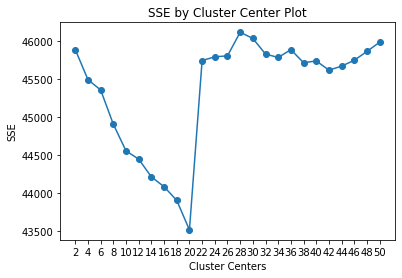

In [74]:
find_optimal_clusters(fox_Vects, 50)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


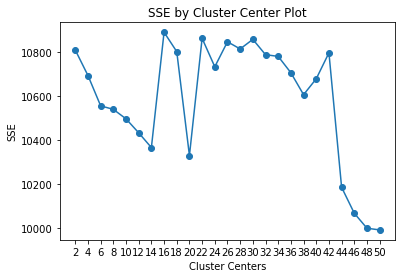

In [75]:
find_optimal_clusters(abc_Vects, 50)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


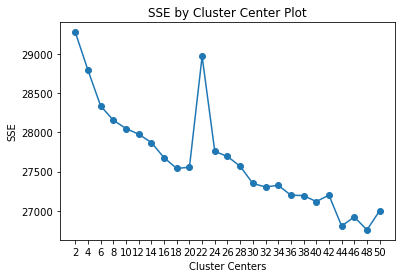

In [76]:
find_optimal_clusters(msnbc_Vects, 50)

#### 3.2.2 Selecting Cluster Number - Silhouette Method

In [78]:
# Applying Principal Component Analysis (PCA) 
PCA = sklearn.decomposition.PCA

# PCA for FOX
pca_fox = PCA(n_components=2).fit(fox_Vects.toarray())
reduced_data_fox = pca_fox.transform(fox_Vects.toarray())

# PCA for ABC
pca_abc = PCA(n_components=2).fit(abc_Vects.toarray())
reduced_data_abc = pca_abc.transform(abc_Vects.toarray())

# PCA for MSNBC
pca_msnbc = PCA(n_components=2).fit(msnbc_Vects.toarray())
reduced_data_msnbc = pca_msnbc.transform(msnbc_Vects.toarray())

In [79]:
def plotSilhouette(n_clusters, X, pca):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples of cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = matplotlib.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st principal component")
    ax2.set_ylabel("Feature space for the 2nd principal component")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

Silhouette Analysis (Left Plot):
- Assess the quality of the clustering
- Each bar represents a cluster (from 1 to 10), and the length of the bar represents the silhouette coefficient of the samples within that cluster
- The silhouette coefficient values range from -1 to 1. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters


Cluster Visualization (Right Plot):
- Show data points colored according to the cluster they belong to, as determined by the KMeans algorithm
- First two principal components:a form of dimensionality reduction that transforms the data into a new coordinate system where the greatest variance by any projection of the data comes to lie on the first coordinate and the second greatest variance on the second coordinate, and so on

For n_clusters = 5 The average silhouette_score is : 0.6770313708133022


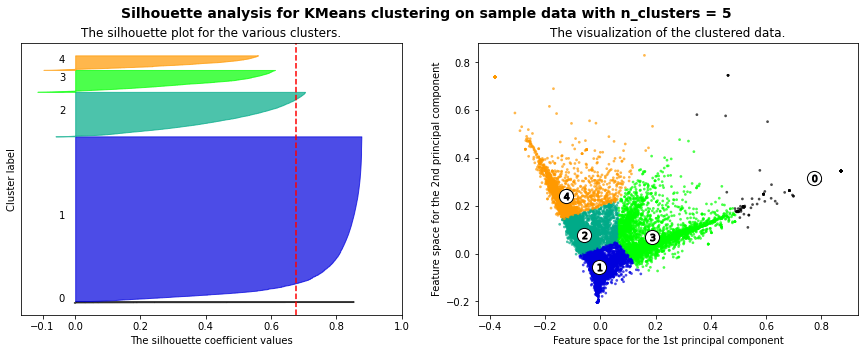

In [81]:
plotSilhouette(n_clusters=5, X=reduced_data_fox, pca=pca_fox)

For n_clusters = 10 The average silhouette_score is : 0.6358678239204021


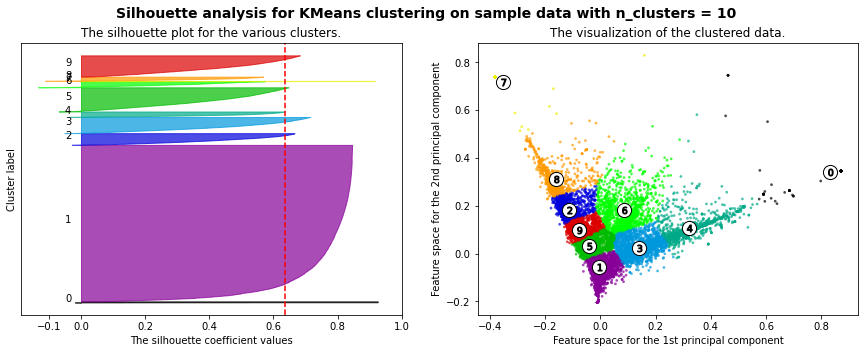

In [80]:
plotSilhouette(n_clusters=10, X=reduced_data_fox, pca=pca_fox)

For n_clusters = 15 The average silhouette_score is : 0.5333783118255645


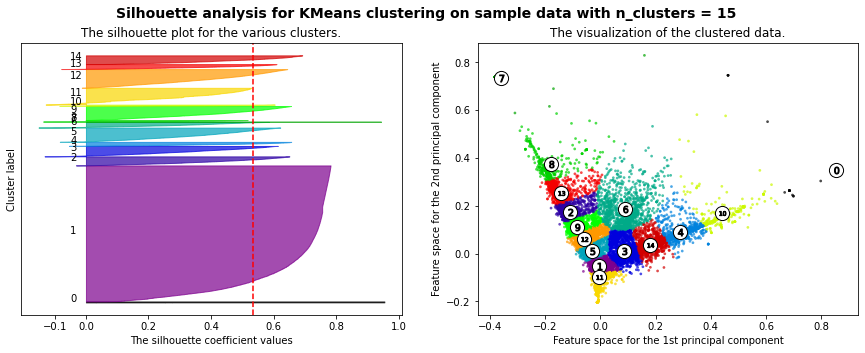

In [82]:
plotSilhouette(n_clusters=15, X=reduced_data_fox, pca=pca_fox)

Based on the above, the best cluster number for the FOX news comments corpus is 5 with an average silhouette_score of 0.6770313708133022

For n_clusters = 5 The average silhouette_score is : 0.5840348016065173


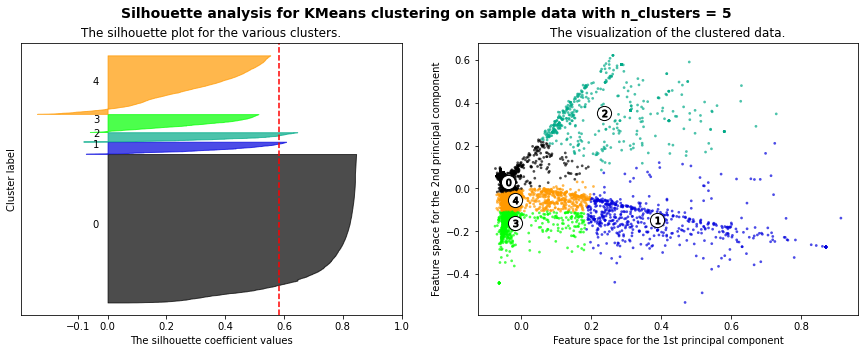

In [83]:
plotSilhouette(n_clusters=5, X=reduced_data_abc, pca=pca_abc)

For n_clusters = 10 The average silhouette_score is : 0.6192701277433432


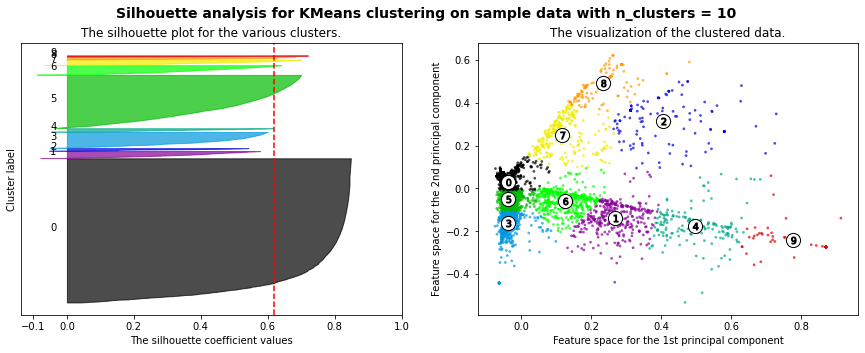

In [84]:
plotSilhouette(n_clusters=10, X=reduced_data_abc, pca=pca_abc)

For n_clusters = 15 The average silhouette_score is : 0.5473936109361635


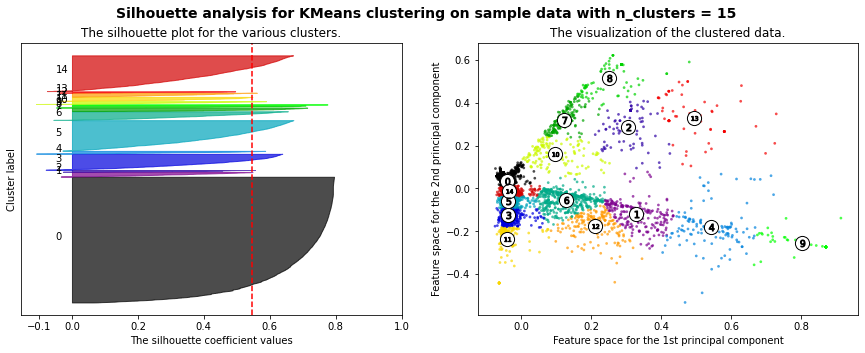

In [85]:
plotSilhouette(n_clusters=15, X=reduced_data_abc, pca=pca_abc)

Based on the above, the best cluster number for the ABC news comments corpus is 10 with an average silhouette_score of 0.6192701277433432

For n_clusters = 5 The average silhouette_score is : 0.7133394451924701


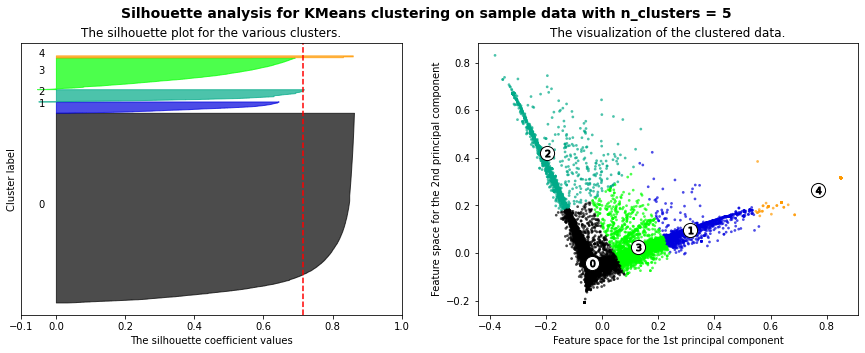

In [86]:
plotSilhouette(n_clusters=5, X=reduced_data_msnbc, pca=pca_msnbc)

For n_clusters = 10 The average silhouette_score is : 0.685807128968311


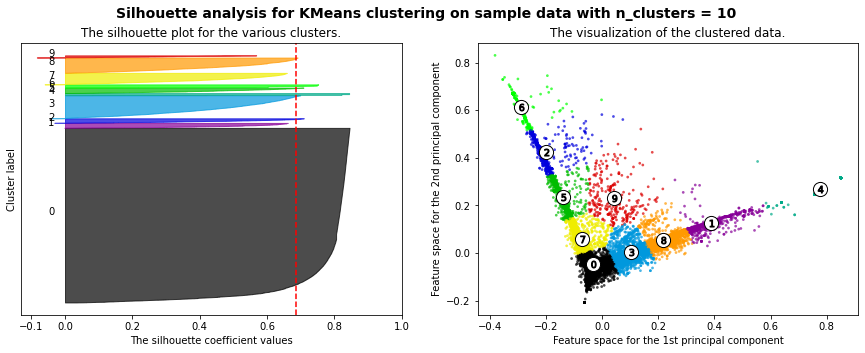

In [87]:
plotSilhouette(n_clusters=10, X=reduced_data_msnbc, pca=pca_msnbc)

For n_clusters = 15 The average silhouette_score is : 0.556843962470059


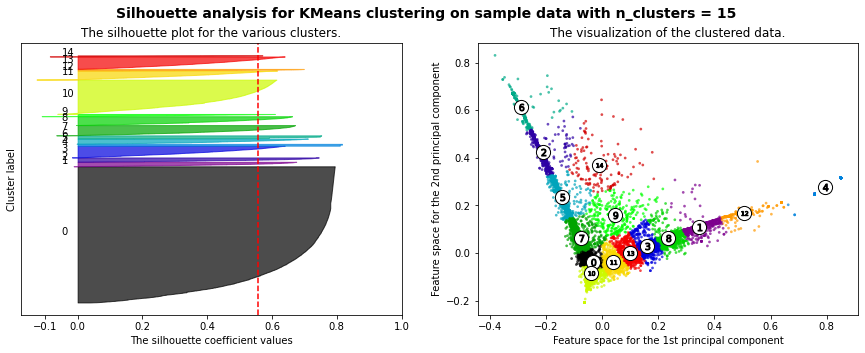

In [88]:
plotSilhouette(n_clusters=15, X=reduced_data_msnbc, pca=pca_msnbc)

Based on the above, the best cluster number for the MSNBC news comments corpus is 5 with an average silhouette_score of 0.7133394451924701